In [8]:
import sklearn
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
assert sklearn.__version__ >='020'
assert sys.version_info >= (3, 6)

In [ ]:
from  google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn import svm
svm_ies = pd.read_csv('https://raw.githubusercontent.com/renatoRPv13/aprendizado_d_maquina/main/ies_recursos_sem_nan_utf8.csv',index_col=0, encoding="latin-1")
set(svm_ies["TIPO_CATEGORIA_ADM"])

{'Privada sem fins lucrativos', 'PÃºblica Estadual', 'PÃºblica Federal'}

In [ ]:
from sklearn import preprocessing
from copy import deepcopy

u = deepcopy(svm_ies)

le = preprocessing.LabelEncoder()

le.fit(svm_ies["TIPO_CATEGORIA_ADM"])
svm_ies["TIPO_CATEGORIA_ADM"]=le.transform(svm_ies["TIPO_CATEGORIA_ADM"])
le_name_mapping_1 = dict(zip(le.classes_, le.transform(le.classes_)))

def np_encoder(object):
    if isinstance(object, np.generic):
        return object.item()

import json
a = json.dumps(le_name_mapping_1, default=np_encoder, indent=True, ensure_ascii=False)

ff = '{'
ff += f'\n"TIPO_CATEGORIA_ADM": [\n{a}\n]'
ff += '\n}'

f = open("mapa_categorias.json", "w")
f.write(ff)
f.close()

svm_ies.to_csv("https://raw.githubusercontent.com/renatoRPv13/aprendizado_d_maquina/main/ies_recursos_sem_nan_utf8.csv")

svm_ies

,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,TIPO_CATEGORIA_ADM,CODIGO_IES
DEFICIENCIA_FISICA,,,,,
5.1,3.5,1.4,0.2,2,0
4.9,3.0,1.4,0.2,2,0
4.7,3.2,1.3,0.2,2,0
4.6,3.1,1.5,0.2,2,0
5.0,3.6,1.4,0.2,2,0
...,...,...,...,...,...
6.7,3.0,5.2,2.3,0,2
6.3,2.5,5.0,1.9,0,2
6.5,3.0,5.2,2.0,0,2


In [ ]:
#svm_ies.fillna(0, inplace=True)
#svm_ies.head(2)

In [ ]:

#svm_ies1 = pd.DataFrame(svm_ies, columns=['CODIGO_IES'])
#svm_ies1['CODIGO_IES'] = svm_ies1.index
#svm_ies1.index = range(len(svm_ies1))
#svm_ies1.head()

In [ ]:
svm_ies.describe()

,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,TIPO_CATEGORIA_ADM,CODIGO_IES
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,3.054000,3.758667,1.198667,1.000000,1.000000
std,0.433594,1.764420,0.763161,0.819232,0.819232
min,2.000000,1.000000,0.100000,0.000000,0.000000
25%,2.800000,1.600000,0.300000,0.000000,0.000000
50%,3.000000,4.350000,1.300000,1.000000,1.000000
75%,3.300000,5.100000,1.800000,2.000000,2.000000
max,4.400000,6.900000,2.500000,2.000000,2.000000


In [ ]:
svm_ies.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 150 entries, 5.1 to 5.9
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DEFICIENCIA_AUDITIVA    150 non-null    float64
 1   DEFICIENCIA_VISUAL      150 non-null    float64
 2   DEFICIENCIA_COGNITIVA   150 non-null    float64
 3   TIPO_CATEGORIA_ADM      150 non-null    int64  
 4   CODIGO_IES              150 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 7.0 KB


In [ ]:
codigo_ies = svm_ies.pop('TIPO_CATEGORIA_ADM')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svc = SVC(gamma="auto")

cv_result = cross_val_score(svc, svm_ies,codigo_ies, cv=10, scoring="accuracy")
print("Acurácia com cross validation:", cv_result.mean()*100)

Acurácia com cross validation: 100.0


In [ ]:
#svm_ies.fillna(, inplace=True)
#svm_ies.head(2)

In [ ]:
svc.fit(svm_ies, codigo_ies)
svc.predict([[6.9,2.8,6.1,2.3]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([0])

Text(0.5, 1.0, 'SVM')

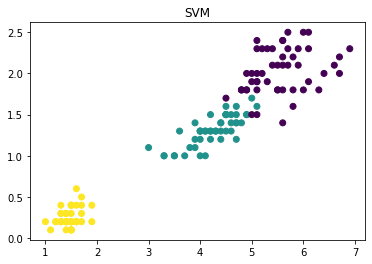

In [ ]:
plt.scatter(svm_ies['DEFICIENCIA_VISUAL'], svm_ies['DEFICIENCIA_COGNITIVA'], c=codigo_ies)
plt.title('SVM')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


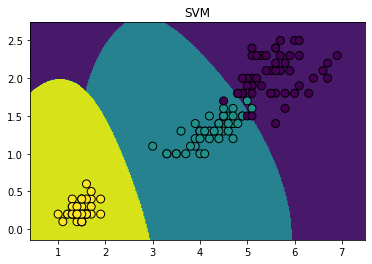

In [ ]:
#Provavelmente criando duas features novas no svm_ies o svm com 2 features terá mais sucesso, mas por enquanto usei só
#DEFICIENCIA_VISUAL e DEFICIENCIA_COGNITIVA (os mais relevantes das 4 features já existentes)

x0_min, x0_max = svm_ies['DEFICIENCIA_VISUAL'].min(), svm_ies['DEFICIENCIA_VISUAL'].max()
x1_min, x1_max = svm_ies['DEFICIENCIA_COGNITIVA'].min(), svm_ies['DEFICIENCIA_COGNITIVA'].max()
w = x0_max - x0_min
h = x1_max - x1_min
x0, x1 = np.meshgrid(np.linspace(x0_min-.1*w, x0_max+.1*w, 300),
                         np.linspace(x1_min-.1*h, x1_max+.1*h, 300))

svc.fit(svm_ies[['DEFICIENCIA_VISUAL', 'DEFICIENCIA_COGNITIVA']], codigo_ies)
ypred = svc.predict(np.c_[x0.reshape(-1, 1), x1.reshape(-1, 1)])
ypred = ypred.reshape(x0.shape)
        
plt.contourf(x0, x1, ypred)
plt.scatter(svm_ies['DEFICIENCIA_VISUAL'], svm_ies['DEFICIENCIA_COGNITIVA'], c=codigo_ies, s=64, edgecolors='k')
plt.title('SVM')
plt.show()